In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# import ydata_profiling as pp
import seaborn as sns
from datetime import datetime
# from scipy.stats import pearsonr, spearmanr, kendalltau
import statsmodels.api as sm
# import phik
import warnings
import os
import random

In [2]:
import warnings
from google.colab import files
uploaded = files.upload()

Saving CPI & factors dataset (vr.3).csv to CPI & factors dataset (vr.3).csv


In [3]:
df = pd.read_csv('CPI & factors dataset (vr.3).csv')
print(df.head())
print(df.tail())
data_describe = df.drop(columns=['Year'])
print(data_describe.describe())


   Year    Label   CPI  Unemployment rate  DJI Index Close  Crude Oil Price  \
0  1980  1980 01  77.8                6.9            875.9            39.00   
1  1980  1980 02  78.9                6.8            863.1            37.25   
2  1980  1980 03  80.1                6.6            785.8            37.00   
3  1980  1980 04  81.0                6.7            817.1            36.58   
4  1980  1980 05  81.8                7.1            850.9            37.05   

    PPI  
0  85.2  
1  86.9  
2  87.5  
3  87.8  
4  88.3  
     Year    Label      CPI  Unemployment rate  DJI Index Close  \
519  2023  2023 04  303.363                3.1         34101.46   
520  2023  2023 05  304.127                3.4         32908.27   
521  2023  2023 06  305.109                3.8         34407.60   
522  2023  2023 07  305.691                3.8         35559.53   
523  2023  2023 08  307.026                3.9         34721.91   

     Crude Oil Price      PPI  
519            82.46  256.908 

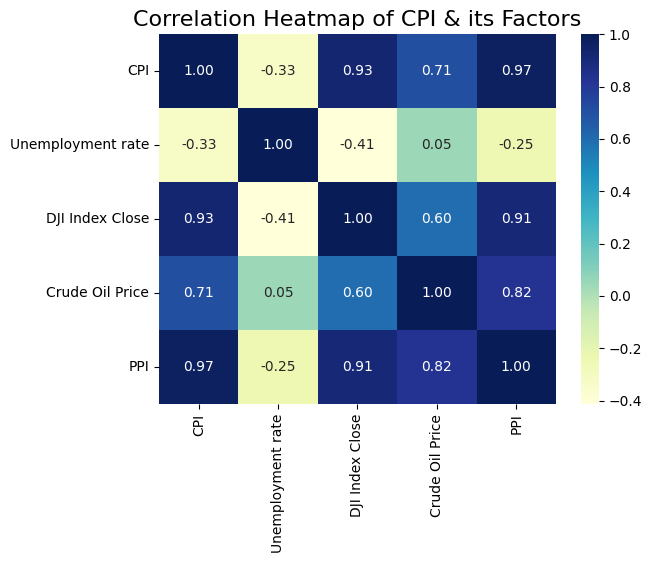

   Year    Label   CPI  Unemployment rate  DJI Index Close  Crude Oil Price  \
0  1980  1980 01  77.8                6.9            875.9            39.00   
1  1980  1980 02  78.9                6.8            863.1            37.25   
2  1980  1980 03  80.1                6.6            785.8            37.00   
3  1980  1980 04  81.0                6.7            817.1            36.58   
4  1980  1980 05  81.8                7.1            850.9            37.05   

    PPI  
0  85.2  
1  86.9  
2  87.5  
3  87.8  
4  88.3  
     Year    Label      CPI  Unemployment rate  DJI Index Close  \
519  2023  2023 04  303.363                3.1         34101.46   
520  2023  2023 05  304.127                3.4         32908.27   
521  2023  2023 06  305.109                3.8         34407.60   
522  2023  2023 07  305.691                3.8         35559.53   
523  2023  2023 08  307.026                3.9         34721.91   

     Crude Oil Price      PPI  
519            82.46  256.908 

In [4]:
sns.heatmap(df.iloc[:, 2:].corr(), annot=True, cmap='YlGnBu', fmt='.2f')
plt.title('Correlation Heatmap of CPI & its Factors', fontsize=16)
plt.show()

print(df.head())
print(df.tail())
data_describe = df.drop(columns=['Year'])
print(data_describe.describe())

In [5]:
num_rows_to_delete = int(len(df) * 0.07)

column_to_delete = [2,3,4,5,6]

for col in column_to_delete:
    # Randonly chooose deleted df
    rows_to_delete = random.sample(range(len(df)), num_rows_to_delete)
    # replace the deleted df to NA
    df.iloc[rows_to_delete, col] = 'NaN'

# save a nwe file of missing dfset
df.to_csv('CPI & factors (vr.2 missing).csv', index=False)


In [35]:
from google.colab import files
uploaded = files.upload()
df_new = pd.read_csv('CPI & factors (vr.3 missing).csv')

Saving CPI & factors (vr.3 missing).csv to CPI & factors (vr.3 missing) (4).csv


In [36]:
data_describe = df_new.drop(columns=['Year'])
print(data_describe.describe())

              CPI  Unemployment rate  DJI Index Close  Crude Oil Price  \
count  420.000000         420.000000       420.000000       420.000000   
mean   181.224710           6.147619     10556.628619        44.968048   
std     58.236532           1.828251      9155.928994        30.146433   
min     77.800000           3.100000       785.800000        10.410000   
25%    133.525000           4.800000      2729.100000        19.135000   
50%    179.800000           5.800000      9791.790000        32.900000   
75%    230.304750           7.300000     13361.200000        62.747500   
max    307.026000          13.000000     35819.560000       132.830000   

              PPI  
count  420.000000  
mean   150.045517  
std     44.824286  
min     85.200000  
25%    114.275000  
50%    131.350000  
75%    192.175000  
max    280.251000  


In [7]:
# Replace NAN to Float nan
df_new.replace("NaN", float("nan"), inplace=True)

factors_col = ['CPI', 'Unemployment rate', 'DJI Index Close', 'Crude Oil Price', 'PPI']

In [8]:
## Method 1 : Filled the Missing Value by each column's mean
# Calculate the mean for each column and fill it into the missing value
for column in ['CPI', 'Unemployment rate', 'DJI Index Close', 'Crude Oil Price', 'PPI']:
    mean_value = round(df_new[column].mean(),1)
    df_new[column].fillna(mean_value, inplace=True)

# Save the new edit file
df_new.to_csv("filled_dataset_1.csv", index=False)

In [9]:
from google.colab import files
uploaded = files.upload()
df_m1 = pd.read_csv('filled_dataset_1.csv')


Saving filled_dataset_1.csv to filled_dataset_1 (1).csv


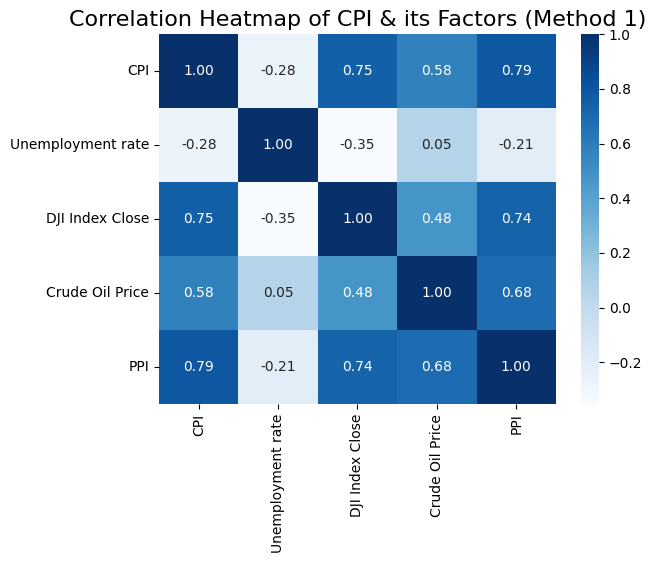

   Year    Label    CPI  Unemployment rate  DJI Index Close  Crude Oil Price  \
0  1980  1980 01   77.8                6.9          10556.6            39.00   
1  1980  1980 02   78.9                6.8            863.1            37.25   
2  1980  1980 03   80.1                6.6            785.8            37.00   
3  1980  1980 04   81.0                6.7          10556.6            36.58   
4  1980  1980 05  181.2                6.1            850.9            37.05   

    PPI  
0  85.2  
1  86.9  
2  87.5  
3  87.8  
4  88.3  
     Year    Label      CPI  Unemployment rate  DJI Index Close  \
519  2023  2023 04  303.363                3.1         10556.60   
520  2023  2023 05  304.127                3.4         32908.27   
521  2023  2023 06  305.109                3.8         34407.60   
522  2023  2023 07  305.691                3.8         35559.53   
523  2023  2023 08  307.026                3.9         34721.91   

     Crude Oil Price      PPI  
519            45.00  15

In [10]:
sns.heatmap(df_m1.iloc[:, 2:].corr(), annot=True, cmap='Blues', fmt='.2f')
plt.title('Correlation Heatmap of CPI & its Factors (Method 1)', fontsize=16)
plt.show()

print(df_m1.head())
print(df_m1.tail())
data_describe = df_m1.drop(columns=['Year'])
print(data_describe.describe())

In [19]:
from google.colab import files
uploaded = files.upload()
df_new = pd.read_csv('CPI & factors (vr.3 missing).csv')

Saving CPI & factors (vr.3 missing).csv to CPI & factors (vr.3 missing) (3).csv


In [12]:
## Method 2 : Fille the Missing Value by each column's High correlations realtoin mean

# Set the 'Label' to be the index
df['Label'] = pd.to_datetime(df['Label'])
df.set_index('Label', inplace=True)

# Set the columns and their difference interval for each column
diff_ranges = {
    'CPI': {
        'related_columns': ['PPI', 'DJI Index Close'],
        'thresholds': {'PPI': 15, 'DJI Index Close': 2000}
    },
    'Unemployment rate': {
        'related_columns': ['CPI', 'DJI Index Close'],
        'thresholds': {'CPI': 40, 'DJI Index Close': 2000}
    },
    'DJI Index Close': {
        'related_columns': ['CPI', 'PPI'],
        'thresholds': {'CPI': 40, 'PPI': 15}
    },
    'Crude Oil Price': {
        'related_columns': ['CPI', 'PPI'],
        'thresholds': {'CPI': 40, 'PPI': 15}
    },
    'PPI': {
        'related_columns': ['CPI', 'DJI Index Close'],
        'thresholds': {'CPI': 40, 'DJI Index Close': 2000}
    }
}

# Go through every column and fill in the missing data
for col, config in diff_ranges.items():
    related_cols = config['related_columns']
    thresholds = config['thresholds']

    for index, row in df.iterrows():
        if pd.isna(row[col]):
            similar_rows = df[
                (abs(df[related_cols[0]] - row[related_cols[0]]) <= thresholds[related_cols[0]])
                & (abs(df[related_cols[1]] - row[related_cols[1]]) <= thresholds[related_cols[1]])
            ]
            if not similar_rows.empty:
                fill_value = round(similar_rows[col].mean(),1)
                df.at[index, col] = fill_value

# Reset the Index
df.reset_index(inplace=True)

# Show the FIlled dataset
print("\nFilled Dataset:")
print(df)

# Save new file
df.to_csv("filled_dataset_2.csv", index=False)


Filled Dataset:
         Label  Year      CPI Unemployment rate DJI Index Close  \
0   1980-01-01  1980     77.8               6.9           875.9   
1   1980-02-01  1980     78.9               6.8           863.1   
2   1980-03-01  1980     80.1               6.6           785.8   
3   1980-04-01  1980     81.0               6.7           817.1   
4   1980-05-01  1980      NaN               7.1             NaN   
..         ...   ...      ...               ...             ...   
519 2023-04-01  2023  303.363               3.1        34101.46   
520 2023-05-01  2023  304.127               3.4             NaN   
521 2023-06-01  2023  305.109               3.8         34407.6   
522 2023-07-01  2023  305.691               3.8        35559.53   
523 2023-08-01  2023  307.026               3.9        34721.91   

    Crude Oil Price      PPI  
0              39.0     85.2  
1             37.25     86.9  
2              37.0     87.5  
3             36.58     87.8  
4             37.05    

In [33]:
from google.colab import files
uploaded = files.upload()
df_m2 = pd.read_csv('filled_dataset_2-2.csv')

Saving filled_dataset_2-2.csv to filled_dataset_2-2.csv


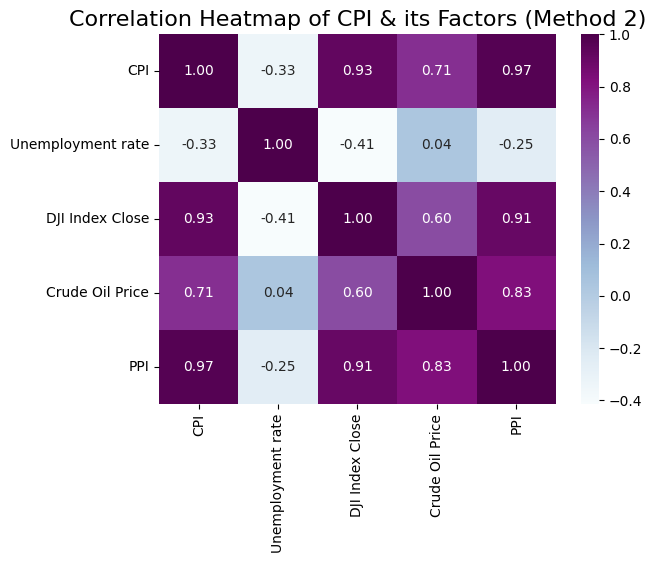

        Label  Year   CPI  Unemployment rate  DJI Index Close  \
0  1980-01-01  1980  77.8                6.9            875.9   
1  1980-02-01  1980  78.9                6.8            863.1   
2  1980-03-01  1980  80.1                6.6            785.8   
3  1980-04-01  1980  81.0                6.7            817.1   
4  1980-05-01  1980  81.8                7.1            850.9   

   Crude Oil Price    PPI  
0            39.00   85.2  
1            37.25   86.9  
2            37.00   87.5  
3            36.58   87.8  
4            37.05  101.9  
          Label  Year      CPI  Unemployment rate  DJI Index Close  \
519  2023-04-01  2023  303.363                3.1         34101.46   
520  2023-05-01  2023  304.127                3.4         32908.27   
521  2023-06-01  2023  305.109                3.8         34407.60   
522  2023-07-01  2023  305.691                3.8         35559.53   
523  2023-08-01  2023  307.026                3.9         34721.91   

     Crude Oil Price

In [34]:
sns.heatmap(df_m2.iloc[:, 2:].corr(), annot=True, cmap='BuPu', fmt='.2f')
plt.title('Correlation Heatmap of CPI & its Factors (Method 2)', fontsize=16)
plt.show()

print(df_m2.head())
print(df_m2.tail())
data_describe = df_m2.drop(columns=['Year'])
print(data_describe.describe())

In [15]:
from google.colab import files
uploaded = files.upload()
df_new = pd.read_csv('CPI & factors (vr.3 missing).csv')

Saving CPI & factors (vr.3 missing).csv to CPI & factors (vr.3 missing) (2).csv


In [16]:
## Method 3 : Linear Interpolation (Timeseries) Method

# Replace NAN to Float nan
df.replace("NaN", float("nan"), inplace=True)

# Set the 'Label' to be the Index
df['Label'] = pd.to_datetime(df['Label'])
df.set_index('Label', inplace=True)

# Use the Linear Interpolation to fill in the data (since its timeseries)
df.interpolate(method='time', inplace=True)

df = df.round(1)

# Rest the Index
df.reset_index(inplace=True)

# SH=how the filled dataset
print(df)

# save new file
df.to_csv("filled_dataset_3.csv", index=False)

         Label  Year    CPI  Unemployment rate  DJI Index Close  \
0   1980-01-01  1980   77.8                6.9            875.9   
1   1980-02-01  1980   78.9                6.8            863.1   
2   1980-03-01  1980   80.1                6.6            785.8   
3   1980-04-01  1980   81.0                6.7            817.1   
4   1980-05-01  1980   81.8                7.1            842.1   
..         ...   ...    ...                ...              ...   
519 2023-04-01  2023  303.4                3.1          34101.5   
520 2023-05-01  2023  304.1                3.4          34252.0   
521 2023-06-01  2023  305.1                3.8          34407.6   
522 2023-07-01  2023  305.7                3.8          35559.5   
523 2023-08-01  2023  307.0                3.9          34721.9   

     Crude Oil Price    PPI  
0               39.0   85.2  
1               37.2   86.9  
2               37.0   87.5  
3               36.6   87.8  
4               37.0   88.3  
..             

In [17]:
from google.colab import files
uploaded = files.upload()
df_m3 = pd.read_csv('filled_dataset_3.csv')

Saving filled_dataset_3.csv to filled_dataset_3 (1).csv


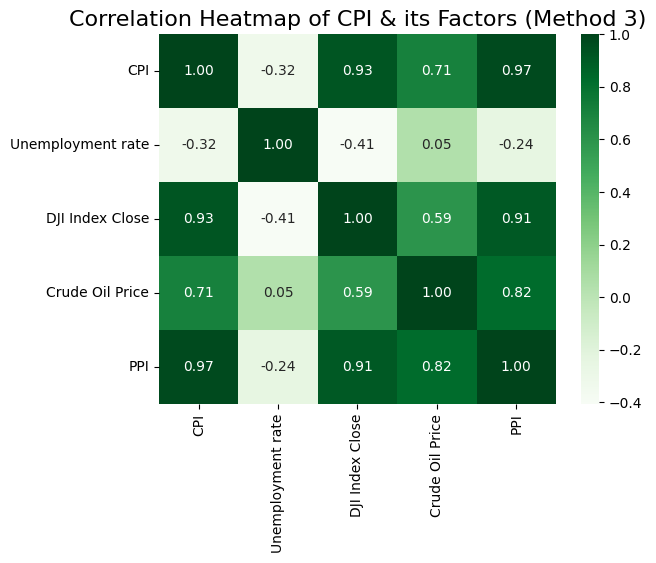

        Label  Year   CPI  Unemployment rate  DJI Index Close  \
0  1980-01-01  1980  77.8                6.9            875.9   
1  1980-02-01  1980  78.9                6.8            863.1   
2  1980-03-01  1980  80.1                6.6            785.8   
3  1980-04-01  1980  81.0                6.7            817.1   
4  1980-05-01  1980  81.8                7.1            842.1   

   Crude Oil Price   PPI  
0             39.0  85.2  
1             37.2  86.9  
2             37.0  87.5  
3             36.6  87.8  
4             37.0  88.3  
          Label  Year    CPI  Unemployment rate  DJI Index Close  \
519  2023-04-01  2023  303.4                3.1          34101.5   
520  2023-05-01  2023  304.1                3.4          34252.0   
521  2023-06-01  2023  305.1                3.8          34407.6   
522  2023-07-01  2023  305.7                3.8          35559.5   
523  2023-08-01  2023  307.0                3.9          34721.9   

     Crude Oil Price    PPI  
519     

In [18]:
sns.heatmap(df_m3.iloc[:, 2:].corr(), annot=True, cmap='Greens', fmt='.2f')
plt.title('Correlation Heatmap of CPI & its Factors (Method 3)', fontsize=16)
plt.show()

print(df_m3.head())
print(df_m3.tail())
data_describe = df_m3.drop(columns=['Year'])
print(data_describe.describe())

In [37]:
##Method 4 Last Observation Carried Forward (LOCF)

# Replace NAN to Float nan
df.replace("NaN", float("nan"), inplace=True)

# 將日期設置為索引
df['Label'] = pd.to_datetime(df['Label'])
df.set_index('Label', inplace=True)

# 使用線性插值填充缺失值
df.interpolate(method='ffill', inplace=True)

df = df.round(1)

# 重設索引
df.reset_index(inplace=True)

# 顯示填充後的數據集
print(df)

# 將填充後的數據覆寫到原始CSV文件中
df.to_csv("filled_dataset_4.csv", index=False)

         Label  Year    CPI  Unemployment rate  DJI Index Close  \
0   1980-01-01  1980   77.8                6.9            875.9   
1   1980-02-01  1980   78.9                6.8            863.1   
2   1980-03-01  1980   80.1                6.6            785.8   
3   1980-04-01  1980   81.0                6.7            817.1   
4   1980-05-01  1980   81.8                7.1            842.1   
..         ...   ...    ...                ...              ...   
519 2023-04-01  2023  303.4                3.1          34101.5   
520 2023-05-01  2023  304.1                3.4          34252.0   
521 2023-06-01  2023  305.1                3.8          34407.6   
522 2023-07-01  2023  305.7                3.8          35559.5   
523 2023-08-01  2023  307.0                3.9          34721.9   

     Crude Oil Price    PPI  
0               39.0   85.2  
1               37.2   86.9  
2               37.0   87.5  
3               36.6   87.8  
4               37.0   88.3  
..             

In [55]:
from google.colab import files
uploaded = files.upload()
df_m4 = pd.read_csv('filled_dataset_4-1.csv')

Saving filled_dataset_4-1.csv to filled_dataset_4-1.csv


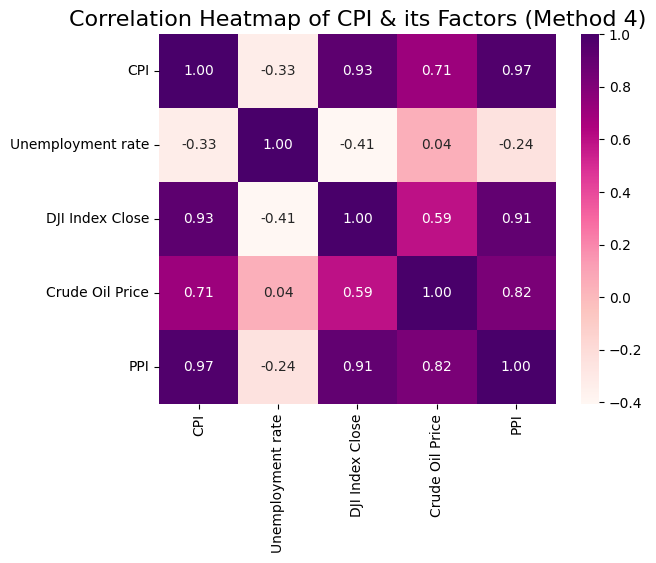

        Label  Year   CPI  Unemployment rate  DJI Index Close  \
0  1980-01-01  1980  77.8                6.9          10663.0   
1  1980-02-01  1980  78.9                6.8            863.1   
2  1980-03-01  1980  80.1                6.6            785.8   
3  1980-04-01  1980  81.0                6.6            817.1   
4  1980-05-01  1980  81.8                7.1            850.9   

   Crude Oil Price   PPI  
0             39.0  85.2  
1             37.2  86.9  
2             37.0  86.9  
3             36.6  86.9  
4             37.0  88.3  
          Label  Year    CPI  Unemployment rate  DJI Index Close  \
519  2023-04-01  2023  303.4                3.1          34101.5   
520  2023-05-01  2023  304.1                3.4          34101.5   
521  2023-06-01  2023  305.1                3.4          34407.6   
522  2023-07-01  2023  305.7                3.8          34407.6   
523  2023-08-01  2023  307.0                3.9          34407.6   

     Crude Oil Price    PPI  
519     

In [56]:
sns.heatmap(df_m4.iloc[:, 2:].corr(), annot=True, cmap='RdPu', fmt='.2f')
plt.title('Correlation Heatmap of CPI & its Factors (Method 4)', fontsize=16)
plt.show()

print(df_m4.head())
print(df_m4.tail())
data_describe = df_m4.drop(columns=['Year'])
print(data_describe.describe())

In [40]:
##Method 5

# Replace NAN to Float nan
df.replace("NaN", float("nan"), inplace=True)

# 將日期設置為索引
df['Label'] = pd.to_datetime(df['Label'])
df.set_index('Label', inplace=True)

# 使用線性插值填充缺失值
df.interpolate(method='bfill', inplace=True)

df = df.round(1)

# 重設索引
df.reset_index(inplace=True)

# 顯示填充後的數據集
print(df)

# 將填充後的數據覆寫到原始CSV文件中
df.to_csv("filled_dataset_5.csv", index=False)

         Label  Year    CPI  Unemployment rate  DJI Index Close  \
0   1980-01-01  1980   77.8                6.9            875.9   
1   1980-02-01  1980   78.9                6.8            863.1   
2   1980-03-01  1980   80.1                6.6            785.8   
3   1980-04-01  1980   81.0                6.7            817.1   
4   1980-05-01  1980   81.8                7.1            842.1   
..         ...   ...    ...                ...              ...   
519 2023-04-01  2023  303.4                3.1          34101.5   
520 2023-05-01  2023  304.1                3.4          34252.0   
521 2023-06-01  2023  305.1                3.8          34407.6   
522 2023-07-01  2023  305.7                3.8          35559.5   
523 2023-08-01  2023  307.0                3.9          34721.9   

     Crude Oil Price    PPI  
0               39.0   85.2  
1               37.2   86.9  
2               37.0   87.5  
3               36.6   87.8  
4               37.0   88.3  
..             

In [57]:
from google.colab import files
uploaded = files.upload()
df_m5 = pd.read_csv('filled_dataset_5-1.csv')

Saving filled_dataset_5-1.csv to filled_dataset_5-1.csv


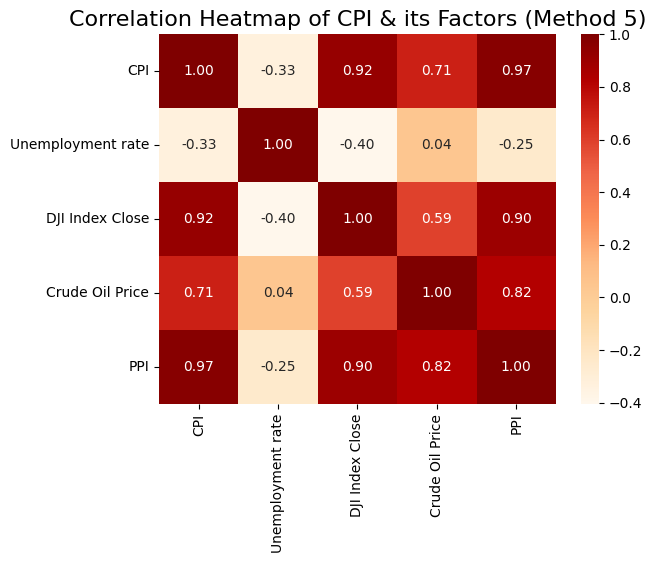

        Label  Year   CPI  Unemployment rate  DJI Index Close  \
0  1980-01-01  1980  77.8                6.9            863.1   
1  1980-02-01  1980  78.9                6.8            863.1   
2  1980-03-01  1980  80.1                6.6            785.8   
3  1980-04-01  1980  81.0                7.1            817.1   
4  1980-05-01  1980  81.8                7.1            850.9   

   Crude Oil Price   PPI  
0             39.0  85.2  
1             37.2  86.9  
2             37.0  88.3  
3             36.6  88.3  
4             37.0  88.3  
          Label  Year    CPI  Unemployment rate  DJI Index Close  \
519  2023-04-01  2023  303.4                3.1          34101.5   
520  2023-05-01  2023  304.1                3.4          34407.6   
521  2023-06-01  2023  305.1                3.8          34407.6   
522  2023-07-01  2023  305.7                3.8          10585.6   
523  2023-08-01  2023  307.0                3.9          10585.6   

     Crude Oil Price    PPI  
519     

In [58]:
sns.heatmap(df_m5.iloc[:, 2:].corr(), annot=True, cmap='OrRd', fmt='.2f')
plt.title('Correlation Heatmap of CPI & its Factors (Method 5)', fontsize=16)
plt.show()

print(df_m5.head())
print(df_m5.tail())
data_describe = df_m5.drop(columns=['Year'])
print(data_describe.describe())